# Statistical Analysis: Impact of Maternal Smoking on Infant Birth Weight


## Summary
### Objective:
To investigate whether maternal smoking during pregnancy has a statistically significant effect on the birth weight of full-term, singleton baby boys.

### Hypothesis:
- **Null ($H_0$):** $\mu_{NonSmoker} = \mu_{Smoker}$
- **Alternative ($H_1$):** $\mu_{NonSmoker} \ne \mu_{Smoker}$

### Methodology:
- **Sample:** $N=1236$ full-term, singleton male births (742 non-smokers; 484 smokers; 10 Unknown). **10 data points** were missing from the binary smoke feature and were removed via listwise deletion.
- **Test:** A two-tailed **Welch's t-test ($\alpha=0.05$)** was used to account for unequal sample sizes and potential variance heterogeneity.
- **Statistical Measures:** Exploratory Data Analysis via seaborn, Confident Intervals (95%) of individual means and differences in means, two-tailed **Welch's t-test ($\alpha=0.05$)**, Cohen's d for effect size.

### Key Findings:
- **Significance:** A significant difference in birth weight was observed ($p<.001$). Boys born to non-smokers had a significantly higher average birth weight **123.1 oz.** (95% CI: 121.8, 124.3) compared to infants born to smokers **114.1 oz.** (95% CI: 112.5, 115.7). The complete lack of overlap between the 95% Confidence Intervals provides compelling evidence that this difference is robust and not due to mere chance.
- **Magnitude of Effect** Mean difference in birth weight between both groups is **8.9 oz.** (95% CI: 6.9, 11.0). This average weight difference is clinically concerning for babies born, at term, weighing around 88 oz. (5.5 pounds) - small for their gestational age. [Nol2000](#Nol2000)
- **Effect Size:** Cohen's d of **0.51** (95% CI: 0.39, 0.62) indicates **moderate effect size**. The confidence interval remains above the threshold for a "small effect".

### Conclusion:
We reject the null hypothesis ($p<.001$). There is a highly significant statistical difference in birth weight of full-term, singleton baby boys between the smoking and non-smoking groups. However, this is a limited, bivariate dataset and does not include confounding variables—such as maternal age, height, pre-pregnancy weight, or parity. A more extensive dataset of birthweights can be found here under sub heading **"Maternal Smoking and Infant Health II"**: https://www.stat.berkeley.edu/users/statlabs/labs.html#babies

### Data Source:
- This dataset comes from “the Child Health and Development Studies (CHDS) — a comprehensive investigation of all pregnancies that occurred between **1960 and 1967** among women in the Kaiser Foundation Health Plan in the San Francisco–East Bay area (Yerushalmy [Yer71](#Yer71))
- This dataset is fully explored in chapter 1 of this academic text [Nol2000](#Nol2000)
- The dataset, used for this notebook, has been downloaded from https://www.stat.berkeley.edu/users/statlabs/labs.html#babiesI under the subheading **"Maternal Smoking and Infant Health I"**, and it has been converted into a csv and cleaned. 

### Dataset Attributes

- **bwt (Birth weight)**: Baby boys weight at birth in ounces. (999) indicates missing value.
- **smoke (Smoking status)**: Indicator for whether the mother smoked (1) or not (0) during her pregnancy. (9) inidcates missing value.


## Exploratory Data Analysis (EDA)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import pingouin as pg #Effect size

In [8]:
data = pd.read_csv('data/babiesI.csv', delimiter=' ') #Data seperated by a space
data.head()

,bwt,smoke
0,120,0
1,113,0
2,128,1
3,123,0
4,108,1


### Summary Statistics

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   bwt     1236 non-null   int64
 1   smoke   1236 non-null   int64
dtypes: int64(2)
memory usage: 19.4 KB


In [10]:
#Summary statistics of all babies weights
data['bwt'].describe()

count    1236.000000
mean      119.576861
std        18.236452
min        55.000000
25%       108.750000
50%       120.000000
75%       131.000000
max       176.000000
Name: bwt, dtype: float64

- The smallest baby is 55 oz. "Babies weighing less than 3 pounds, 5 ounces (1,500 grams or 53 oz.) at birth are considered very low birth weight...Low birth weight is most often caused by premature birth." [[Stan](#Stan)]. Maybe, this data set contains some records of premature births - this will skew this dataset.
- There are no zero values (or close to zero) for weight, giving more credibility to the low outliers in this dataset.
-  The max value is 176oz which is 11lb - a big baby but not likely an erroneous datapoint.

In [11]:
#Any missing smoke values? If so they'll appear as 9 in dataset
data['smoke'].value_counts()

smoke
0    742
1    484
9     10
Name: count, dtype: int64

For this dataset, 9 was added to smoking status if it was not known or recorded (see Dataset Attributes above). 

We see here there are 10 missing values for smoking status. These records will be removed via listwise deletion because they cannot serve our objective.

In [12]:
#Any missing birth weight values? If so they'll appear as 999 in dataset
missing_weight = (data['bwt'] == 999).sum()
print(f'Number of missing weight values: {missing_weight}')

Number of missing weight values: 0


There are no missing values (999) in the birth weight column.

In [13]:
#Performing listwise deletion of rows with missing values (9) in the smoke column (i.e. any row with a 9)
data_clean = data[data['smoke'] != 9].reset_index(drop=True)

In [14]:
data_clean['smoke'].value_counts()

smoke
0    742
1    484
Name: count, dtype: int64

Missing values have been successfully removed and we are using a new dataframe of cleaned records. 

### Balanced Dataset?

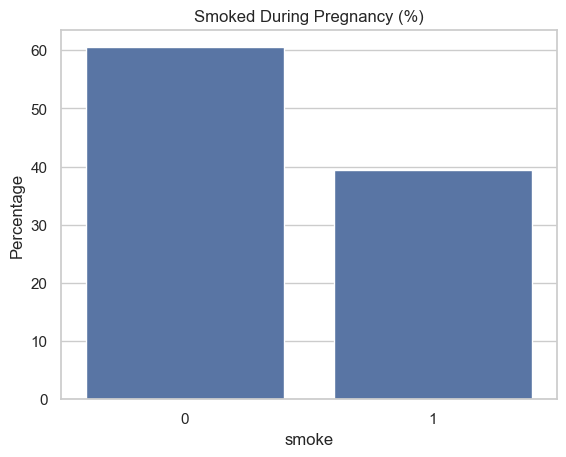

In [15]:
sns.countplot(data=data_clean, x='smoke', stat='percent')
plt.title('Smoked During Pregnancy (%)')
plt.ylabel('Percentage')
plt.show()

**Slightly imbalanced dataset.**   
#### Social-Desirability Bias?
- Only ~40% of mothers smoked during pregnancy for this sample. Could it be possible that some mothers might have been reluctant to admit to smoking while pregnant and that's why the value is lower? In the 1960s (when CHDS data was primarily collected), smoking was, more likely, far more socially acceptable than it is today.

### Non-Smokers Descriptive Statistics

In [16]:
#We need to analyse the descriptive statistics individually 
#for birth weights of Baby boys of smoking mothers and non-smoking mothers.

data_non_smoke = data_clean[data_clean['smoke']==0].reset_index(drop=True)
data_smoke = data_clean[data_clean['smoke']==1].reset_index(drop=True)

data_non_smoke.describe()

,bwt,smoke
count,742.000000,742.0
mean,123.047170,0.0
std,17.398689,0.0
min,55.000000,0.0
25%,113.000000,0.0
50%,123.000000,0.0
75%,134.000000,0.0
max,176.000000,0.0


Mean and median are nearly identical for non-smokers.

### Smokers Descriptive Statistics

In [17]:
data_smoke.describe()

,bwt,smoke
count,484.000000,484.0
mean,114.109504,1.0
std,18.098946,0.0
min,58.000000,1.0
25%,102.000000,1.0
50%,115.000000,1.0
75%,126.000000,1.0
max,163.000000,1.0


Again, mean and median are very close in value for smokers.

### Box Plots (Smokers & Non-Smokers)

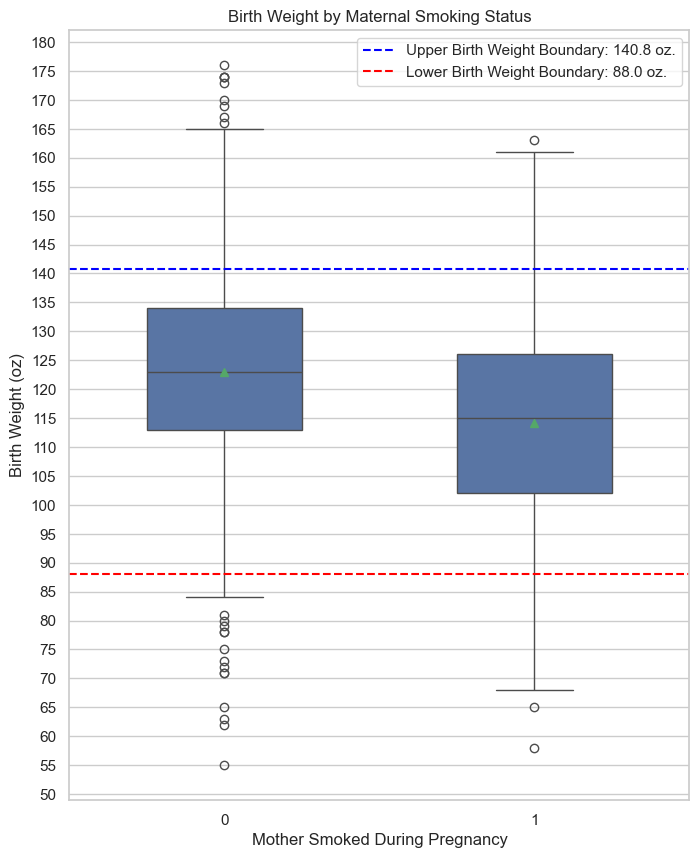

In [23]:
min_birth_weight = 88 #The minimum threshold weight for babies born at term. Under this value, babies are considered small for their gestational age.
max_birth_weight = 140.8 
plt.figure(figsize=(8, 10))
sns.set_theme(style='whitegrid')
sns.boxplot(data=data_clean, x='smoke', y='bwt', width=.5, showmeans=True)
plt.locator_params(axis='y', nbins=30)
plt.title('Birth Weight by Maternal Smoking Status')
plt.xlabel('Mother Smoked During Pregnancy')
plt.ylabel('Birth Weight (oz)')
plt.axhline(y=max_birth_weight, color='blue', linestyle='--', label=f'Upper Birth Weight Boundary: {max_birth_weight:.1f} oz.')
plt.axhline(y=min_birth_weight, color='red', linestyle='--', label=f'Lower Birth Weight Boundary: {min_birth_weight:.1f} oz.')
plt.legend()
plt.show()

"Most newborns range from 45 to 55 cm in length and from 5.5 to 8.8 pounds (88oz to 140.8oz) [**red and blue dotted lines ----**]...Babies born at term that weigh under 5.5 pounds are considered small for their gestational age.”[Nol2000](#Nol2000) (pp. 3-4).

The median and means (green triangle) for both groups are very similar. For the Non-Smoking group (0), the presence of outliers at both extremes indicates a heavy-tailed distribution. Cofounding variables could be a factor, for example, mother's age, health, parity etc. 

Initial inspection confirms reduced birth weights among infants of mothers who smoked. However, as confounding variables (such as maternal nutrition, mother's age, and socioeconomic status) are not available in this specific dataset, it is impossible to determine the extent to which these external factors contributed to the observed weight deficit. This leaves open the possibility of residual confounding, where the 'smoker effect' may be partially explained by other correlated health behaviours (alcohol consumption, dietary patterns, etc.).

### Histogram Plot (Smokers & Non-Smokers)

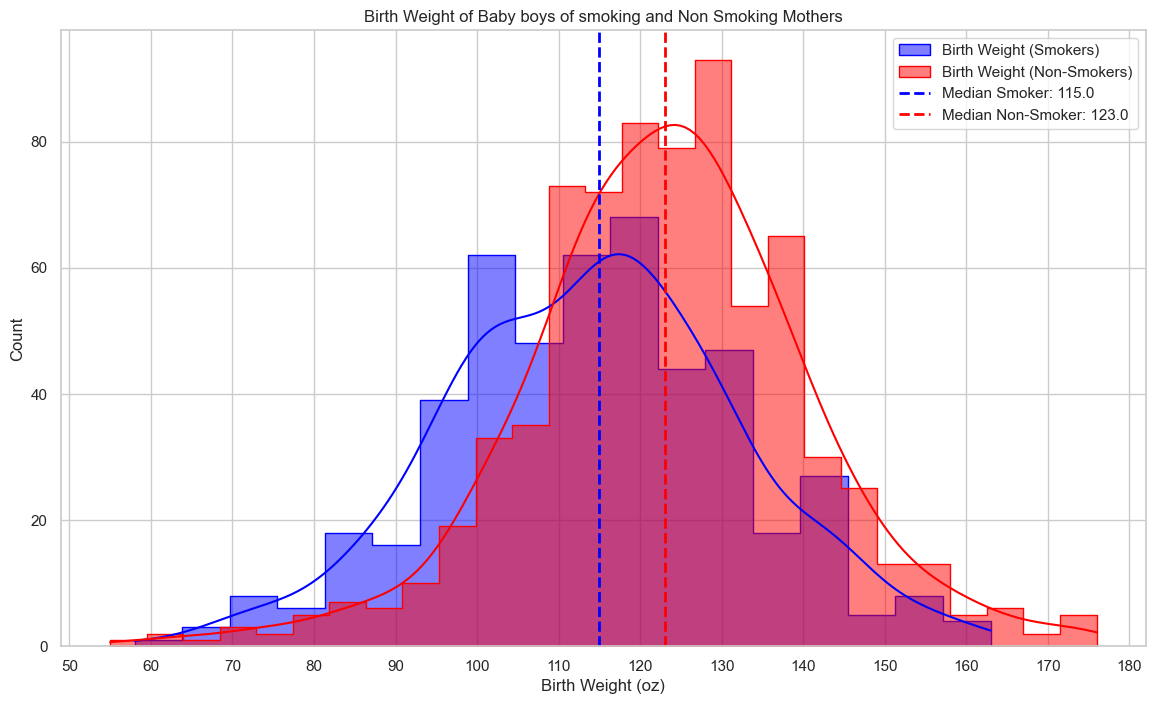

In [24]:
#Plotting histogram of both groups and marking their medians with dotted lines.
#Looking at shape of distribution including modality.
#Using medians instead of means because medians more robust against outliers
#But could use trimmed mean
median_smoke = data_smoke['bwt'].median()
median_non_smoke = data_non_smoke['bwt'].median()

sns.set_theme(style='whitegrid')
plt.figure(figsize=(14, 8))
sns.histplot(data_smoke['bwt'],
             stat='count',
             color='blue',
             label='Birth Weight (Smokers)',
             kde=True,
             element='step')

sns.histplot(data_non_smoke['bwt'],
             stat='count',
             color='red',
             label='Birth Weight (Non-Smokers)',
             kde=True,
             element='step')

plt.axvline(median_smoke, color='blue', linestyle='--', linewidth=2, label=f'Median Smoker: {median_smoke:.1f}')
plt.axvline(median_non_smoke, color='red', linestyle='--', linewidth=2, label=f'Median Non-Smoker: {median_non_smoke:.1f}')

plt.title('Birth Weight of Baby boys of smoking and Non Smoking Mothers')
plt.xlabel('Birth Weight (oz)')
plt.ylabel('Count')
plt.legend()
plt.locator_params(axis='x', nbins=20)
plt.show()


Birth weight distribution for smoking mothers is bimodal and slightly negatively skewed (skewed left). This bimodal distribution could be caused by the daily amount smoked by mothers. Some mothers may only smoke a little and, therefore, their babies will be born slightly higher weight; those who smoke a lot, will most likely have sons that weigh less at birth (indicated by the left peak). There is also no information on whether the mother stopped smoking during pregnancy - this might lead to higher birth weight. 

Birth weight distribution for non-smoking mothers is unimodal.


## Statistical Inference

### 95% Confidence Interval of Individual Means

In [25]:
#Splitting dataset into smoking and non-smoking
non_smoke_group = data_non_smoke['bwt']
smoke_group = data_smoke['bwt']

#Define z* critical value for 95% CI
z_star = stats.norm.ppf(0.975)
#print(f'z* value: {z_star:.2f}')

#components for non-smokers
n_non = len(non_smoke_group)
mean_non = np.mean(non_smoke_group)
std_non = np.std(non_smoke_group, ddof=1) # Use ddof=1 for sample standard deviation
se_non = std_non / np.sqrt(n_non)

#components for smokers
n_smoke = len(smoke_group)
mean_smoke = np.mean(smoke_group)
std_smoke = np.std(smoke_group, ddof=1)
se_smoke = std_smoke / np.sqrt(n_smoke)

# Final Confidence Intervals
ci_non = (mean_non - z_star * se_non, mean_non + z_star * se_non)
ci_smoke = (mean_smoke - z_star * se_smoke, mean_smoke + z_star * se_smoke)

print(f"Average birth weight for Non-Smokers: {mean_non:.2f} oz, [95% CI {ci_non[0]:.2f}, {ci_non[1]:.2f}] ")
print(f"Average birth weight for Smokers:     {mean_smoke:.2f} oz, [95% CI {ci_smoke[0]:.2f}, {ci_smoke[1]:.2f}] ")

Average birth weight for Non-Smokers: 123.05 oz, [95% CI 121.80, 124.30] 
Average birth weight for Smokers:     114.11 oz, [95% CI 112.50, 115.72] 


Infants born to non-smokers had a significantly higher average birth weight **123.05 oz**, (95% CI: 121.80, 124.30) compared to infants born to smokers **114.11 oz**, (95% CI: 112.50, 115.72). The narrow 95% Confidence Intervals for both groups indicate that these sample means are highly representative of the true population means and they do not overlap between both groups.

### Welch's t-test with 95% Confidence Interval (Difference of Means)

In [26]:
# equal_var=False turns on the Welch's mode!
# Perform Welch's t-test (two tailed - Gold Standard)
res = stats.ttest_ind(non_smoke_group, smoke_group, equal_var=False, alternative='two-sided')
# Get the 95% CI for the difference of means
ci = res.confidence_interval(confidence_level=0.95)
t_stat = res.statistic
p_val = res.pvalue
dof = res.df

mean_diff = mean_non - mean_smoke

print(f"Welch's T-statistic: {t_stat:.4g}")
print(f"Degrees of Freedom: {dof:.2f}")
print(f"P-value: {p_val:.3e}")
print(f"Mean difference: {mean_diff:.2f} oz., 95% CI (Difference of Means): [{ci.low:.2f} oz, {ci.high:.2f} oz]")

Welch's T-statistic: 8.581
Degrees of Freedom: 1003.20
P-value: 3.524e-17
Mean difference: 8.94 oz., 95% CI (Difference of Means): [6.89 oz, 10.98 oz]


- Employed a Welch's t-test to account for the differences in the sample sizes between both groups and the slight difference in their variance.
- t-statistic (8.581) - High signal to noise ratio
- p-value very small!
- The mean difference in birth weights between smoking and non-smoking groups shows substantial difference and the confidence intervals remain entirely above zero.
- The analysis shows a statistically significant and clinically relevant change in birth weight between both groups. However, these results should be interpreted with caution; as a bivariate analysis, the study does not account for potential confounding variables.

### Effect Size (Cohen's d)

In [27]:
# Calculate Cohen's d for groups
d = pg.compute_effsize(non_smoke_group, smoke_group, paired=False, eftype='cohen')
# Get the CI for that d
ci = pg.compute_esci(stat=d, nx=len(non_smoke_group), ny=len(smoke_group), eftype='cohen', confidence=0.95)

print(f"Cohen's d: {d:.2f}, 95% CI: {ci}")

Cohen's d: 0.51, 95% CI: [0.39 0.62]


The calculated effect size (Cohen's d 0.51) indicates a medium effect, suggesting that maternal smoking has a clinically non-trivial impact on infant birth weight.

## Conclusion
A Welch's t-test was conducted to compare the birth weights of, singleton baby boys born to mothers who smoked during pregnancy and those who did not. The analysis yielded a significant difference (**t(1003.20)=8.581, p<.001**) with a moderate effect size Cohen's d: **0.51**, (95% CI: 0.39 0.62). 

Given the high t-statistic and substantial degrees of freedom, the null hypothesis of equal mean birth weights is rejected, indicating that smoking during pregnancy has a statistically significant negative effect on the birth weight of baby boys. However, results must be interpreted with measured caution. This study does not account for potential confounding variables that could significantly effect birth weight.

## References
<a id='Nol2000'></a>[Nol2000] Nolan, D., & Speed, T. (2000). Stat Labs: Mathematical Statistics Through Applications. New York: Springer.

<a id='Stan'></a>[Stan] Stanford Medicine Children's Health. (n.d.). Low birth weight. https://www.stanfordchildrens.org/en/topic/default?id=low-birth-weight-90-P02382

<a id='Yer71'></a>[Yer71] J. Yerushalmy. The relationship of parents’ cigarette smoking to outcome of pregnancy—implications as to the problem of inferring causation from observed associations. Am. J. Epidemiol., 93:443–456, 1971. 